# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 2
## HANDS-ON TRAINING OF LINEAR REGRESSOR

**Objectives:** We look at the sequence by which we can derive the best fit line. We will use the Gradient Descent and actually execute it in stages to understand how it works.

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats as stat
import time

We will work with the same data as before. We note that this is actual experimental data for the **Simple Pendulum** experiment; the length in cm and the period of oscillation in seconds are the two columns of data. So we will use the names **l** and **t** from now on. Recall that $L \propto T^2$

In [2]:
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
l = data['l'].values
t = data['t'].values
tsq = t * t

We quickly summarise the essenial parts of the Gradient Descent method:

 $y = mx + c$
 
 $E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y_i - y)^2$
 
 $\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y_i - (mx_i + c))$
 
 $\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y_i - (mx_i + c))$

In [4]:
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_on_all(x, y, m, c, eta, iterations=1000):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

## TRAIN

## Let us visualize the training:
### $\eta$ = 0.01

Training for 1000 iterations, plotting after every 100 iterations:

In [5]:
# Init m, c
m, c = 0, 0

In [6]:
# Learning rate
lr = 0.001

<IPython.core.display.Javascript object>


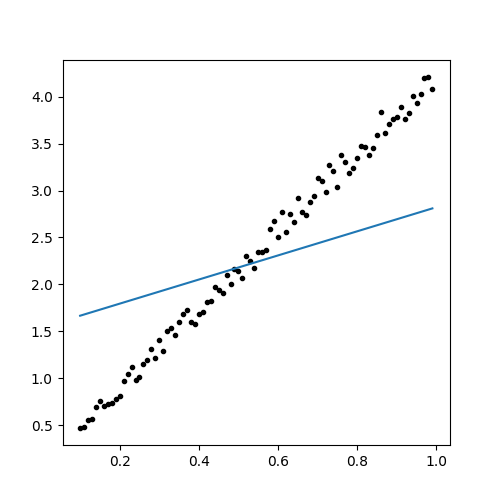

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


In [7]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

Clearly this is not enough.

Let us train for a 1000 more iterations, with a greater learning rate:

### $\eta$ = 0.01

In [8]:
# Learning rate
lr = 0.01

<IPython.core.display.Javascript object>


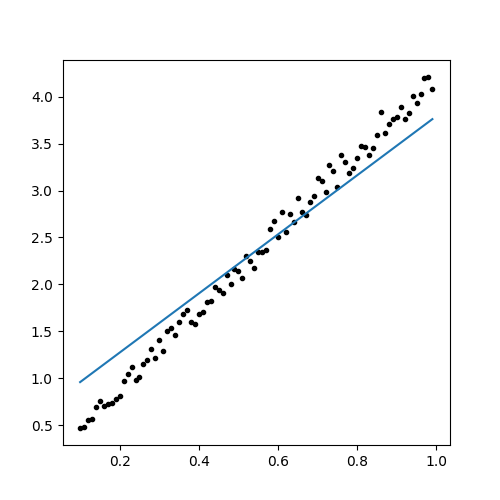

m = 1.6271 c = 1.50581 Error = 0.438483
m = 1.87729 c = 1.37356 Error = 0.358145
m = 2.0989 c = 1.24705 Error = 0.292872
m = 2.29856 c = 1.13239 Error = 0.239735
m = 2.47868 c = 1.02891 Error = 0.196477
m = 2.6412 c = 0.935541 Error = 0.161262
m = 2.78783 c = 0.851296 Error = 0.132594
m = 2.92013 c = 0.775284 Error = 0.109256
m = 3.0395 c = 0.706702 Error = 0.0902572
m = 3.14721 c = 0.644823 Error = 0.0747905


In [9]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

Let us continue with the same learning rate, and train for 1000 more iterations:

<IPython.core.display.Javascript object>


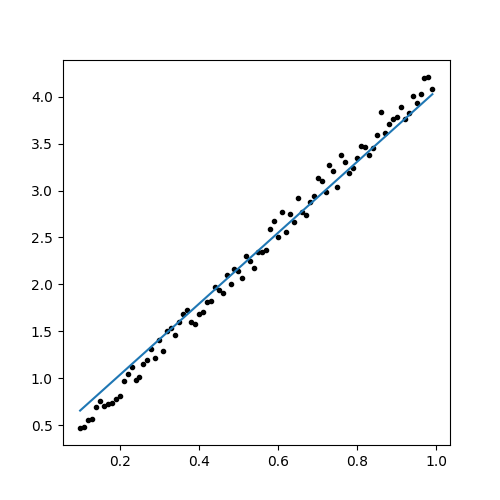

m = 3.24438 c = 0.588992 Error = 0.0621994
m = 3.33206 c = 0.538617 Error = 0.0519493
m = 3.41117 c = 0.493166 Error = 0.0436049
m = 3.48255 c = 0.452157 Error = 0.0368119
m = 3.54695 c = 0.415156 Error = 0.0312818
m = 3.60506 c = 0.381772 Error = 0.0267799
m = 3.65749 c = 0.35165 Error = 0.023115
m = 3.70479 c = 0.324473 Error = 0.0201315
m = 3.74747 c = 0.299951 Error = 0.0177027
m = 3.78598 c = 0.277826 Error = 0.0157254


In [10]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

This seems correct.

### Comparison with standard library

Let us compare the values we found with the values found by the standard scipy library function "stats":

In [11]:
print("From our Gradient Descent   m = {0:.06} c = {1:.06}".format(m, c))

msp, csp, _, _, _ = stat.linregress(l,tsq)
print("From scipy.stats.linregress m = {0:.06} c = {1:.06}".format(msp, csp))

From our Gradient Descent   m = 3.78598 c = 0.277826
From scipy.stats.linregress m = 4.14148 c = 0.0735804


Close enough!

## Plotting error vs iterations

So far we have seen how the Gradient Descent works by looking at the fit of the regression line. Let us change perspectives and plot the error at various stages. This just shows that the process is converging and gives us a feel for the rate at which it is converging.

$E = \frac{1}{n} ∑_{i=1}^n(y_i−y)^2$

$ = \frac{1}{n} ∑_{i=1}^n(y_i - mx_i - c)^2$

<IPython.core.display.Javascript object>


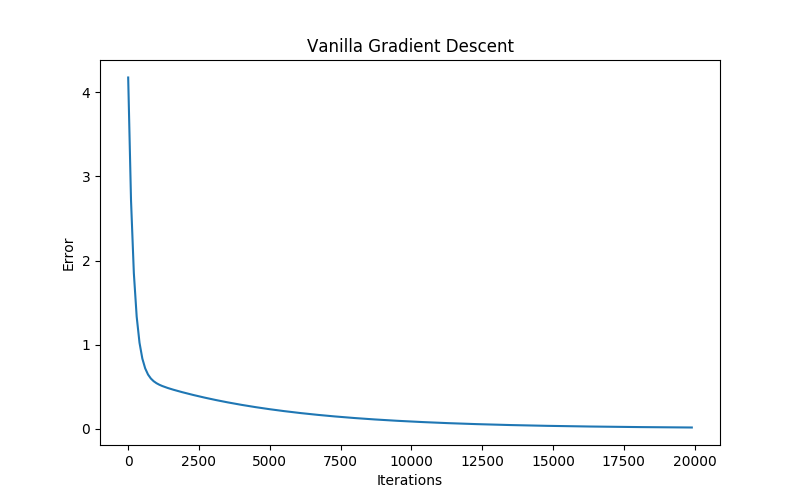

In [15]:
ms, cs,errs = [], [], []
m, c = 0, 0
eta = 0.001
for times in range(200):
    m, c, error = train_on_all(l, tsq, m, c, eta, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 20000,100)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent")
plt.show()

We see that the error at saturation is around 0.01.

## Error vs m, c

Let us visualize the error as a function of **m** and **c**

In [13]:
def error(x,y,m,c):
    ycalc = m * x + c
    error = sum((y - ycalc)**2) / len(y)
    return error

<IPython.core.display.Javascript object>


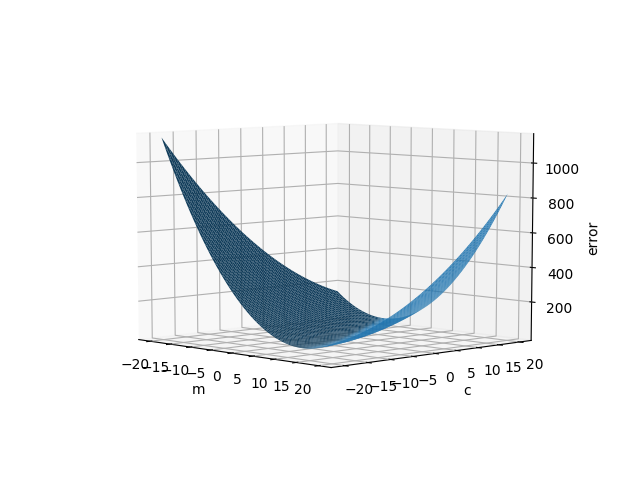

(400, 400) (400, 400) (400, 400)


In [14]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ms1 = np.arange(-20, 20, 0.1)
cs1 = np.arange(-20, 20, 0.1)
X, Y = np.meshgrid(ms1, cs1)
err = []
for i in range(len(ms1)):
    for j in range(len(cs1)):
        err.append(error(l,tsq,ms1[i],cs1[j]))
err = np.array(err)
Z = np.reshape(err,(-1,len(ms1)))
print(X.shape, Y.shape, Z.shape)
ax.plot_surface(X, Y, Z) 
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')
plt.show()